# Etape 4.1 : Graphiques Matplotlib

**Livrables** :
- Ce notebook `09_visualisations_matplotlib.ipynb`
- 5 figures PNG (300 dpi) dans `output/09_figures/`

---
---

## Import

In [1]:
import sys
import os
from pathlib import Path
import psutil
import time
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## (optionnel) Enregistrement de la date de la dernière execution de ce notebook

In [2]:
print(f"- Date de la dernière execution de ce notebook : {datetime.now().strftime('%d/%m/%Y %H:%M:%S')} (FR)")

- Date de la dernière execution de ce notebook : 20/02/2026 20:33:27 (FR)


---

## (Optionnel) Mesure du temps de traitement global pour ce script - enregistrement de l'heure de début + estimation instantanée des ressources machine libres

In [3]:
## Heure de début
start_time_09 = time.time()

## Machine: current available RAM (in GB)
ram_available_09 = psutil.virtual_memory().available / (1024**3)

## Machine: current available CPU
logical = psutil.cpu_count()
physical = psutil.cpu_count(logical=False) or logical

cpu_used = psutil.cpu_percent(interval=2)
cpu_available_pct_09 = 100 - cpu_used

available_logical_09 = logical * cpu_available_pct_09 / 100
available_physical_09 = physical * cpu_available_pct_09 / 100

## Show available resources
print(f"- Current machine RAM available : {ram_available_09:.2f} GB")
print(f"- Current machine CPU available : {cpu_available_pct_09:.2f}%")
print(f"    Approx logical cores free  : {available_logical_09:.1f}")
print(f"    Approx physical cores free : {available_physical_09:.1f}")

- Current machine RAM available : 10.71 GB
- Current machine CPU available : 95.40%
    Approx logical cores free  : 15.3
    Approx physical cores free : 7.6


---

## Chemins des données

In [4]:
# ==============================================================================================================
#                                                   OUTPUTS
# ==============================================================================================================
OUT_DIR = (Path.cwd() / ".." / "output").resolve()
OUT_FIG_DIR = os.path.join(OUT_DIR, "09_figures")
os.makedirs(OUT_FIG_DIR, exist_ok=True)

# ==============================================================================================================
#                                                   INPUTS
# ==============================================================================================================
IN_DIR = (Path.cwd() / ".." / "data").resolve()
IN_CONSO_ENRICHIE_CSV =  os.path.join(OUT_DIR, "05_consommations_enrichies.csv")

# ==============================================================================================================
#                                                    OTHERS
# ==============================================================================================================
TMP_DIR = (Path.cwd() / ".." / "my_tmp").resolve()
TMP_FILE_CSV = TMP_DIR / "tmp_09_resources.txt" # Enregistrer les metrics pour ce script

---

## Chargement des données

In [5]:
df_conso = pd.read_csv(IN_CONSO_ENRICHIE_CSV)

## Affichage de quelques infos
print("df_conso :")
print(f"    - Shape: {df_conso.shape}")
print(f"    - Colonnes: {df_conso.columns.tolist()}")
print()
# Info sur les types
print("    - Infos sur les types : ")
df_conso.info()
print()
## Appercu des donnees
print("    - Appercu des donnees : ")
df_conso.head()

df_conso :
    - Shape: (991, 31)
    - Colonnes: ['batiment_id', 'heure', 'consommation_moyenne', 'unite', 'date', 'type_energie', 'ts_h', 'nom', 'type', 'commune', 'surface_m2', 'annee_construction', 'classe_energetique', 'nb_occupants_moyen', 'temperature_c', 'humidite_pct', 'rayonnement_solaire_wm2', 'vitesse_vent_kmh', 'precipitation_mm', 'jour', 'mois', 'saison', 'jour_de_semaine', 'date_debut', 'date_fin', 'tarif_unitaire', 'cout_financier', 'conso_par_occupant', 'conso_par_m2', 'IPE', 'ecart_moyenne_categorie']

    - Infos sur les types : 
<class 'pandas.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   batiment_id              991 non-null    str    
 1   heure                    991 non-null    int64  
 2   consommation_moyenne     991 non-null    float64
 3   unite                    991 non-null    str    
 4   date                  

,batiment_id,heure,consommation_moyenne,unite,date,type_energie,ts_h,nom,type,commune,...,saison,jour_de_semaine,date_debut,date_fin,tarif_unitaire,cout_financier,conso_par_occupant,conso_par_m2,IPE,ecart_moyenne_categorie
0,BAT0043,22,280.88,m3,2023-01-01,eau,2023-01-01 22:00:00,Piscine Bordeaux 43,piscine,Bordeaux,...,Hiver,6.0,2023-01-01,2023-12-31,3.50,983.080,1.898,0.123,0.123,-401.254
1,BAT0100,17,4.52,m3,2023-01-01,eau,2023-01-01 17:00:00,Mediatheque Rennes 100,mediatheque,Rennes,...,Hiver,6.0,2023-01-01,2023-12-31,3.50,15.820,0.037,0.005,0.005,-92.701
2,BAT0006,3,5.50,kWh,2023-01-01,gaz,2023-01-01 03:00:00,Mairie Paris 6,mairie,Paris,...,Hiver,6.0,2023-01-01,2023-06-30,0.09,0.495,0.087,0.005,0.005,-43.286
3,BAT0126,10,126.88,kWh,2023-01-01,gaz,2023-01-01 10:00:00,Ecole Le Havre 126,ecole,Le Havre,...,Hiver,6.0,2023-01-01,2023-06-30,0.09,11.419,0.375,0.075,0.075,7.068
4,BAT0035,20,3.97,m3,2023-01-02,eau,2023-01-02 20:00:00,Mairie Toulouse 35,mairie,Toulouse,...,NaN,NaN,2023-01-01,2023-12-31,3.50,13.895,0.046,0.005,0.005,-44.816


---

## preparation

In [6]:
# Sécuriser les types
df = df_conso.copy()
df["date"] = pd.to_datetime(df["date"])
if "ts_h" not in df.columns:
    df["ts_h"] = df["date"] + pd.to_timedelta(df["heure"].astype(int), unit="h")

# Enregistrer la figure
def savefig(name: str):
    plt.tight_layout()
    plt.savefig(f"{OUT_FIG_DIR}/{name}.png", dpi=300, bbox_inches="tight")
    plt.close()

---

## Evolution temporelle de la consommation totale par type d'energie (line plot)

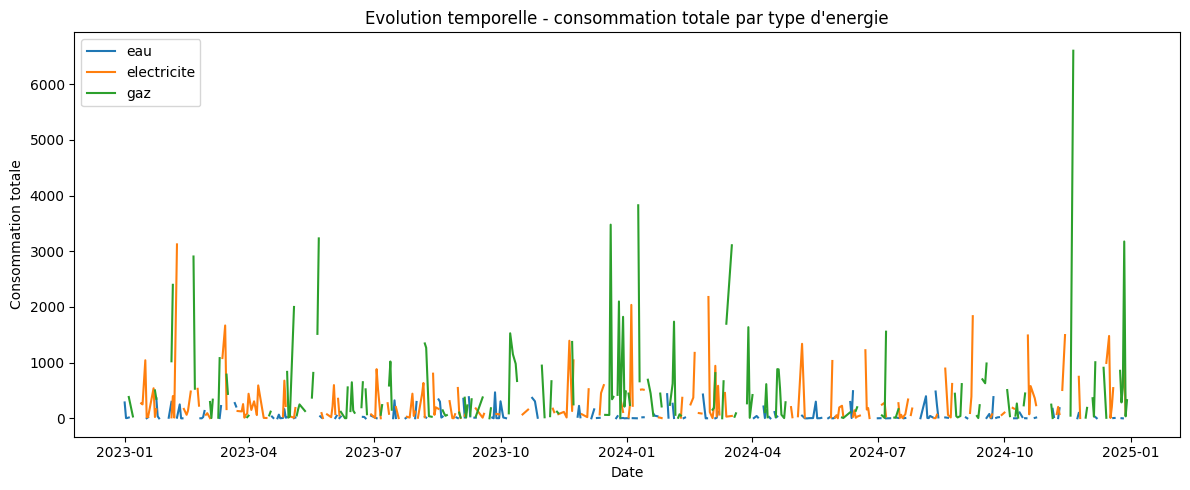

In [7]:
df_daily = (
    df.groupby(["date", "type_energie"])["consommation_moyenne"]
      .sum()
      .reset_index()
)

pivot = df_daily.pivot(index="date", columns="type_energie", values="consommation_moyenne").sort_index()

plt.figure(figsize=(12,5))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], label=col)

plt.title("Evolution temporelle - consommation totale par type d'energie")
plt.xlabel("Date")
plt.ylabel("Consommation totale")
plt.legend()
plt.tight_layout()
plt.savefig(f"{OUT_FIG_DIR}/1_evolution_conso_par_energie.png", dpi=300, bbox_inches="tight")
plt.show()



---

## Distribution des consommations par type de batiment (boxplot)

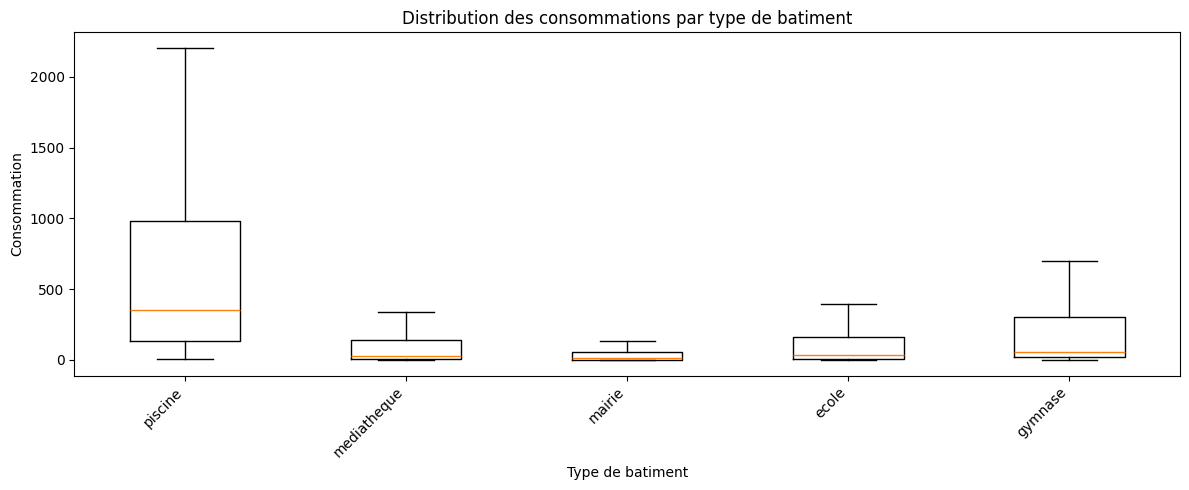

In [8]:
types = df["type"].dropna().unique()
data = [df.loc[df["type"] == t, "consommation_moyenne"].dropna().values for t in types]

plt.figure(figsize=(12,5))
plt.boxplot(data, tick_labels=types, showfliers=False)
plt.title("Distribution des consommations par type de batiment")
plt.xlabel("Type de batiment")
plt.ylabel("Consommation")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(f"{OUT_FIG_DIR}/2_boxplot_conso_par_type_batiment.png", dpi=300, bbox_inches="tight")
plt.show()



---

## Heatmap consommation moyenne par heure et jour de semaine

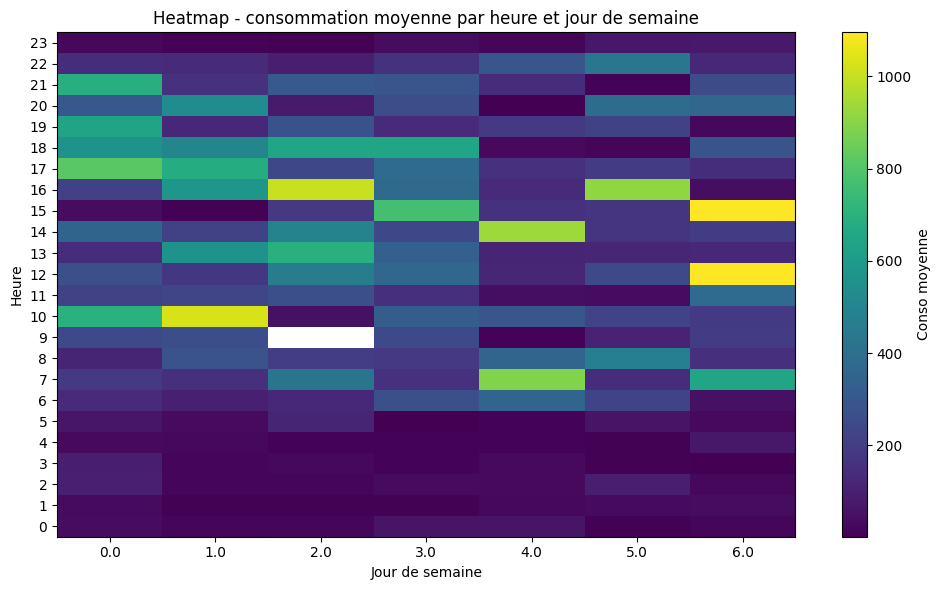

In [9]:
heat = (
    df.pivot_table(
        index="heure",
        columns="jour_de_semaine",
        values="consommation_moyenne",
        aggfunc="mean"
    )
)

# Option : trier les jours 0..6 ou 1..7 selon ton codage
heat = heat.sort_index().sort_index(axis=1)

plt.figure(figsize=(10,6))
plt.imshow(heat.values, aspect="auto", origin="lower")
plt.colorbar(label="Conso moyenne")
plt.title("Heatmap - consommation moyenne par heure et jour de semaine")
plt.xlabel("Jour de semaine")
plt.ylabel("Heure")

plt.xticks(ticks=np.arange(len(heat.columns)), labels=heat.columns)
plt.yticks(ticks=np.arange(len(heat.index)), labels=heat.index)
plt.tight_layout()
plt.savefig(f"{OUT_FIG_DIR}/3_heatmap_heure_jour_semaine.png", dpi=300, bbox_inches="tight")
plt.show()


---

## Scatter plot temperature vs consommation de chauffage avec regression

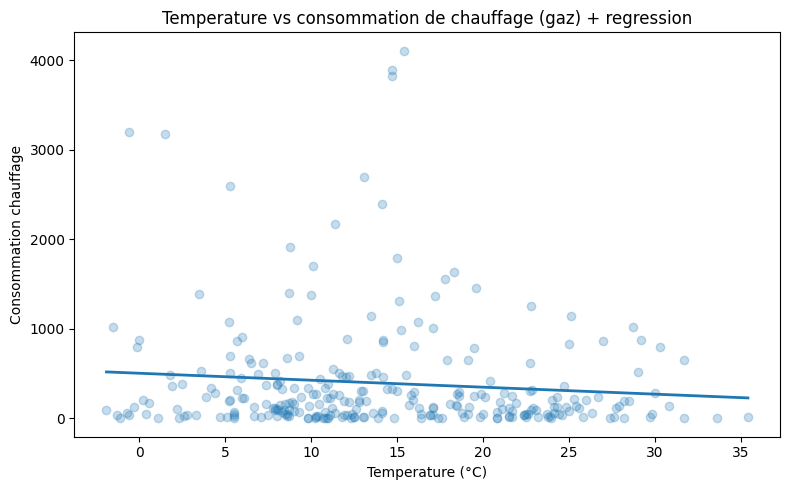

corr(gaz, temperature) = -0.0989468201285463


In [10]:
df_ch = df[df["type_energie"].isin(["gaz"])].dropna(subset=["temperature_c", "consommation_moyenne"])

x = df_ch["temperature_c"].values
y = df_ch["consommation_moyenne"].values

# Régression linéaire (y = a*x + b)
a, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 200)
y_line = a * x_line + b

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.25)
plt.plot(x_line, y_line, linewidth=2)
plt.title("Temperature vs consommation de chauffage (gaz) + regression")
plt.xlabel("Temperature (°C)")
plt.ylabel("Consommation chauffage")
plt.tight_layout()
plt.savefig(f"{OUT_FIG_DIR}/4_scatter_temperature_vs_chauffage_regression.png", dpi=300, bbox_inches="tight")
plt.show()

# (option) afficher corrélation
print("corr(gaz, temperature) =", np.corrcoef(x, y)[0,1])


---

## Comparaison consommation par classe energetique (bar chart)

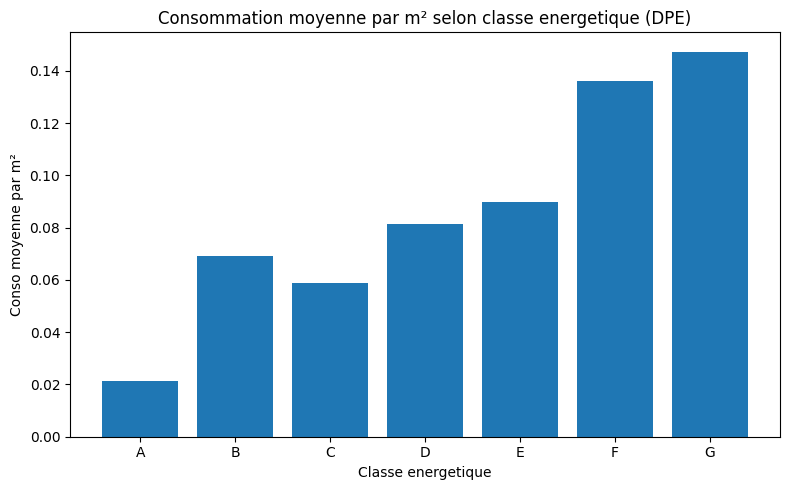

In [11]:
order = ["A","B","C","D","E","F","G"]

bar = (
    df.groupby("classe_energetique")["conso_par_m2"]
      .mean()
      .reindex(order)
)

plt.figure(figsize=(8,5))
plt.bar(bar.index, bar.values)
plt.title("Consommation moyenne par m² selon classe energetique (DPE)")
plt.xlabel("Classe energetique")
plt.ylabel("Conso moyenne par m²")
plt.tight_layout()
plt.savefig(f"{OUT_FIG_DIR}/5_bar_conso_par_classe_energetique.png", dpi=300, bbox_inches="tight")
plt.show()


---

## Libérer la mémoire (Optionnel) 

In [12]:
del df_conso
del df

---

## (Optionnel) enregistrement dans un fichier temporaire du temps d'execution + ressources pour utilisation ultérieure (dans le script run_pipeline_hybride.py ou autres)

In [13]:
temps_execution_09 = time.time() - start_time_09
temps_resources = f"""
    Date : {datetime.now().strftime("%d/%m/%Y %H:%M:%S")} (FR)

    temps_exec_sec={temps_execution_09:.2f}
    ram_gb={ram_available_09:.2f}
    cpu_pct={cpu_available_pct_09:.2f}
    logi_cores={available_logical_09:.1f}
    physi_cores={available_physical_09:.1f}
"""

# Ecrire des données du temps d'execution + ressources dans le fichier TMP_FILE_CSV
TMP_FILE_CSV.write_text(temps_resources, encoding="utf-8")

137